<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction

Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones.

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage.

Therefore if we can determine if the first stage will land, we can determine the cost of a launch.

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

<a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">Spacex DataSet</a>


**Navigate to the Go to UI screen**

*   Refer to this insruction in this <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sign%20up%20for%20IBM%20Cloud%20-%20Create%20Db2%20service%20instance%20-%20Get%20started%20with%20the%20Db2%20console/instructional-labs.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">link</a> for viewing  the   Go to UI screen.

*   Later click on **Data link(below SQL)**  in the Go to UI screen  and click on **Load Data** tab.

*   Later browse for the downloaded spacex file.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/browsefile.png" width="800"/>

*   Once done select the schema andload the file.

 <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/spacexload3.png" width="800"/>


In [5]:
!pip install sqlalchemy
!pip install ibm_db_sa
!pip install ipython-sql

You should consider upgrading via the 'C:\Users\chand\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\chand\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\chand\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [ ]:
%load_ext sql

**DB2 magic in case of old UI service credentials.**

In the next cell enter your db2 connection string. Recall you created Service Credentials for your Db2 instance before. From the **uri** field of your Db2 service credentials copy everything after db2:// (except the double quote at the end) and paste it in the cell below after ibm_db_sa://

<img src ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_edX/images/URI.jpg">

in the following format

**%sql ibm_db_sa://my-username:my-password\@my-hostname:my-port/my-db-name**

**DB2 magic in case of new UI service credentials.**

<img src ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/servicecredentials.png" width=600>  

*   Use the following format.

*   Add security=SSL at the end

**%sql ibm_db_sa://my-username:my-password\@my-hostname:my-port/my-db-name?security=SSL**


In [ ]:
%sql ibm_db_sa://

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

### Task 1

##### Display the names of the unique launch sites  in the space mission


In [1]:
import pandas as pd

In [2]:
df_spaceX = pd.read_csv('Spacex.csv')

In [3]:
from sqlalchemy import create_engine

engine_spaceX_data = create_engine('sqlite://',echo = False)
df_spaceX.to_sql('SPACEX_DATA',con = engine_spaceX_data)

101

In [4]:
statement = "SELECT DISTINCT [Launch_Site] FROM SPACEX_DATA "
pd.DataFrame(engine_spaceX_data.execute(statement).fetchall())

,Launch_Site
0,CCAFS LC-40
1,VAFB SLC-4E
2,KSC LC-39A
3,CCAFS SLC-40


### Task 2

##### Display 5 records where launch sites begin with the string 'CCA'


In [5]:
statement = "SELECT * FROM SPACEX_DATA where [Launch_Site] like 'CCA%' limit 5"
engine_spaceX_data.execute(statement).fetchall()
pd.DataFrame(engine_spaceX_data.execute(statement).fetchall())

,index,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing _Outcome
0,0,04-06-2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,1,08-12-2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2,22-05-2012,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,3,08-10-2012,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,4,01-03-2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3

##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [6]:
statement = "SELECT sum(PAYLOAD_MASS__KG_) FROM SPACEX_DATA where Customer== 'NASA (CRS)'"
engine_spaceX_data.execute(statement).fetchall()

[(45596,)]

### Task 4

##### Display average payload mass carried by booster version F9 v1.1


In [7]:
statement = "SELECT avg(PAYLOAD_MASS__KG_) FROM SPACEX_DATA where [Booster_Version]= 'F9 v1.1'"
engine_spaceX_data.execute(statement).fetchall()

[(2928.4,)]

### Task 5

##### List the date when the first successful landing outcome in ground pad was acheived.

*Hint:Use min function*


In [14]:
df_spaceX['Date'] = pd.to_datetime(df_spaceX['Date'],infer_datetime_format=True)

In [15]:
df_spaceX['Date']

0     2010-04-06
1     2010-08-12
2     2012-05-22
3     2012-08-10
4     2013-01-03
         ...    
96    2020-05-11
97    2020-11-16
98    2020-11-21
99    2020-11-25
100   2020-06-12
Name: Date, Length: 101, dtype: datetime64[ns]

In [20]:
min(df_spaceX[df_spaceX['Landing _Outcome']=='Success (ground pad)']['Date'])

Timestamp('2015-12-22 00:00:00')

In [23]:
statement = "SELECT min(Date) FROM SPACEX_DATA"
engine_spaceX_data.execute(statement).fetchall()

[('01-03-2013',)]

In [24]:
statement = "SELECT MIN(Date) FROM SPACEX_DATA where [Landing _Outcome] like 'Success (ground pad)' "

##### [('2015-12-22'),]

### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [8]:
statement = "SELECT Booster_Version FROM SPACEX_DATA where ([Landing _Outcome] = 'Success (drone ship)') AND ( [PAYLOAD_MASS__KG_] > 4000 AND [PAYLOAD_MASS__KG_] < 6000 )"
pd.DataFrame(engine_spaceX_data.execute(statement).fetchall())

,Booster_Version
0,F9 FT B1022
1,F9 FT B1026
2,F9 FT B1021.2
3,F9 FT B1031.2


### Task 7

##### List the total number of successful and failure mission outcomes


In [9]:
statement = "SELECT Mission_Outcome,count(*) as TOTAL FROM SPACEX_DATA GROUP BY SUBSTR(Mission_Outcome,1,1)"
pd.DataFrame(engine_spaceX_data.execute(statement).fetchall())

,Mission_Outcome,TOTAL
0,Failure (in flight),1
1,Success,100


### Task 8

##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [10]:
statement="SELECT Booster_Version FROM SPACEX_DATA WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEX_DATA) " 
pd.DataFrame(engine_spaceX_data.execute(statement).fetchall())

,Booster_Version
0,F9 B5 B1048.4
1,F9 B5 B1049.4
2,F9 B5 B1051.3
3,F9 B5 B1056.4
4,F9 B5 B1048.5
5,F9 B5 B1051.4
6,F9 B5 B1049.5
7,F9 B5 B1060.2
8,F9 B5 B1058.3
9,F9 B5 B1051.6


### Task 9

##### List the failed landing_outcomes in drone ship, their booster versions, and launch site names for in year 2015


In [128]:
df_spaceX['Date'] = pd.to_datetime(df_spaceX['Date'], format='%y%d%m')

In [95]:
df_spaceX.columns

Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing _Outcome'],
      dtype='object')

In [97]:
df_spaceX.head(1)

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing _Outcome
0,2010-04-06,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)


In [123]:
statement="SELECT Date,Booster_Version,Launch_Site \
            FROM SPACEX_DATA \
            WHERE [Landing _Outcome]='Failure (drone ship)' AND  Date BETWEEN '01-01-2015' AND '31-12-2015'"
pd.DataFrame(engine_spaceX_data.execute(statement).fetchall())

,Date,Booster_Version,Launch_Site
0,10-01-2015,F9 v1.1 B1012,CCAFS LC-40
1,14-04-2015,F9 v1.1 B1015,CCAFS LC-40


### Task 10

##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order


In [27]:
statement='''
        SELECT [Landing _Outcome], count([Landing _Outcome])
            FROM SPACEX_DATA 
            WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
            GROUP BY [Landing _Outcome]
            ORDER BY count([Landing _Outcome]) DESC 
            '''

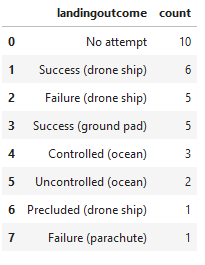

### Reference Links

*   <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01&origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>

*   <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01&origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*   <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01&origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*   <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Hands-on Lab: Analyzing a real World Data Set</a>


## Author(s)

<h4> Lakshmi Holla </h4>


## Other Contributors

<h4> Rav Ahuja </h4>


## Change log

| Date       | Version | Changed by    | Change Description        |
| ---------- | ------- | ------------- | ------------------------- |
| 2021-10-12 | 0.4     | Lakshmi Holla | Changed markdown          |
| 2021-08-24 | 0.3     | Lakshmi Holla | Added library update      |
| 2021-07-09 | 0.2     | Lakshmi Holla | Changes made in magic sql |
| 2021-05-20 | 0.1     | Lakshmi Holla | Created Initial Version   |


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
